In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from textwrap import dedent

In [3]:
maintenance_order = pd.read_csv('maintenance_order.csv')

In [4]:
df = maintenance_order
print(df.isnull().sum())

ORDER               0
BASIC_START_DATE    0
EQUIPMENT_ID        0
ORDER_TYPE          0
DESCRIPTION         0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ORDER             388 non-null    int64 
 1   BASIC_START_DATE  388 non-null    object
 2   EQUIPMENT_ID      388 non-null    int64 
 3   ORDER_TYPE        388 non-null    object
 4   DESCRIPTION       388 non-null    object
dtypes: int64(2), object(3)
memory usage: 15.3+ KB


In [6]:
maintenance_order.columns

Index(['ORDER', 'BASIC_START_DATE', 'EQUIPMENT_ID', 'ORDER_TYPE',
       'DESCRIPTION'],
      dtype='object')

In [8]:
print(df.duplicated().sum())

194


ORDER              Axes(0.125,0.11;0.352273x0.77)
EQUIPMENT_ID    Axes(0.547727,0.11;0.352273x0.77)
dtype: object

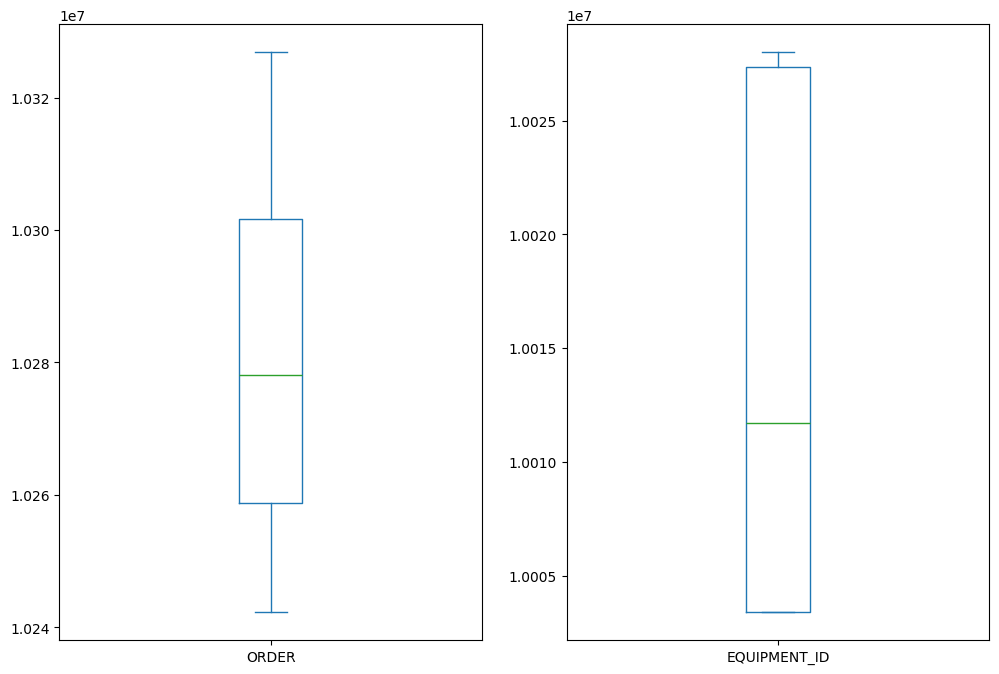

In [9]:
maintenance_order.select_dtypes(include='number').plot(kind='box', subplots=True, figsize=(12, 8), sharex=False)

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>], dtype=object)

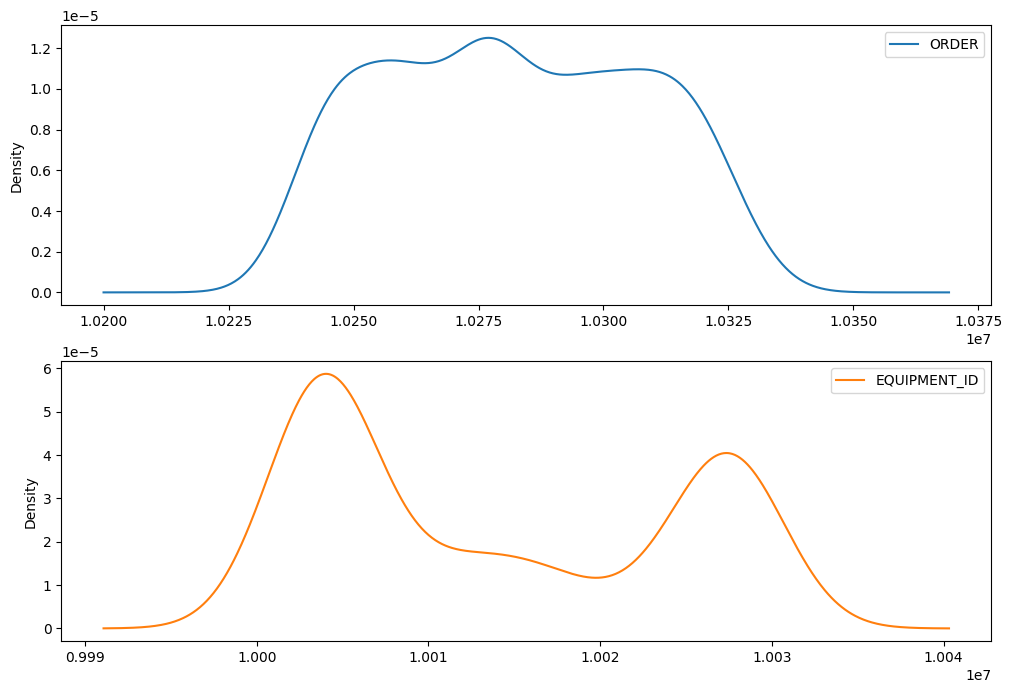

In [10]:
maintenance_order.select_dtypes(include='number').plot(kind='density', subplots=True, figsize=(12, 8), sharex=False)


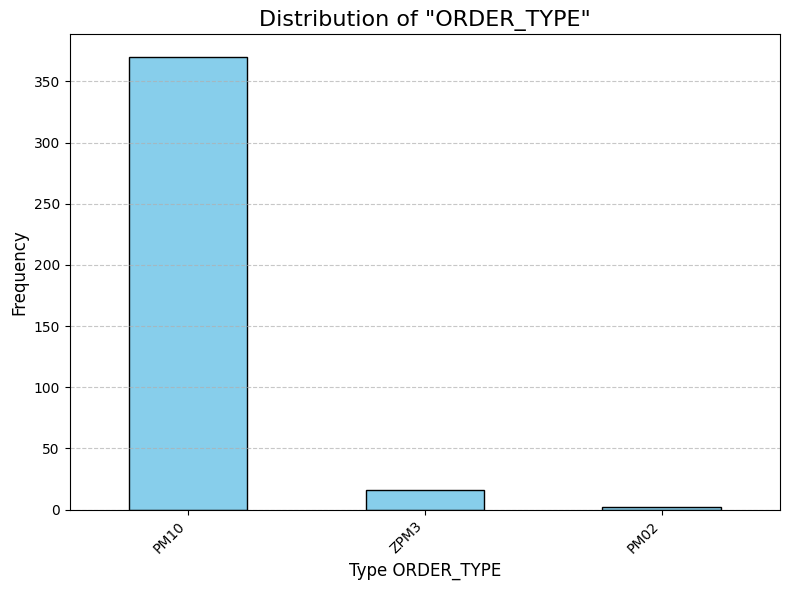

In [11]:
object_cols = maintenance_order.select_dtypes(include='object')
cat_cols = []

threshold = 20

for col in object_cols.columns:
    unique_count = object_cols[col].nunique()
    if unique_count < threshold:
        cat_cols.append(col)


for col in cat_cols:
    value_counts = maintenance_order[col].value_counts()

    plt.figure(figsize=(8, 6))

    value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title(f'Distribution of "{col}"', fontsize=16)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(f'Type {col}', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.show()

In [12]:
maintenance_order.select_dtypes('number').describe()

,ORDER,EQUIPMENT_ID
count,3.880000e+02,3.880000e+02
mean,1.028193e+07,1.001377e+07
std,2.537537e+04,1.047855e+04
min,1.024227e+07,1.000339e+07
25%,1.025874e+07,1.000342e+07
50%,1.027806e+07,1.001170e+07
75%,1.030168e+07,1.002736e+07
max,1.032684e+07,1.002800e+07


In [13]:
object_cols = maintenance_order.select_dtypes(include='object')
object_cols

,BASIC_START_DATE,ORDER_TYPE,DESCRIPTION
0,2025-08-29,PM10,RM TF1E0701
1,2025-08-29,PM10,RM TF1E0701
2,2025-08-26,PM10,RM TF1HPT04
3,2025-08-26,PM10,RM TF1HPT04
4,2025-04-05,PM10,RM TF1E0702
...,...,...,...
383,2025-03-12,PM10,RM TF1FLX01
384,2025-03-19,PM10,RM TF1FLX02
385,2025-03-19,PM10,RM TF1FLX02
386,2025-03-10,PM10,RM TF1HPT05


In [14]:
print(pd.to_datetime(maintenance_order['BASIC_START_DATE']).min())
print(pd.to_datetime(maintenance_order['BASIC_START_DATE']).max())

2025-02-10 00:00:00
2025-08-29 00:00:00


<Axes: xlabel='BASIC_START_DATE', ylabel='Count'>

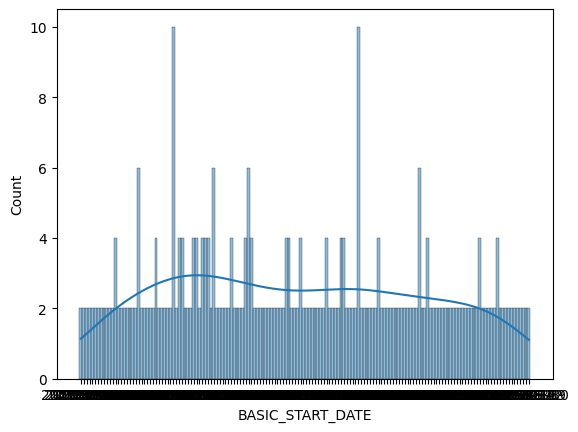

In [15]:
sns.histplot(data= maintenance_order, x = 'BASIC_START_DATE', kde=True)

In [16]:
# Lấy danh sách các cột dạng số
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Các cột dạng số:", num_cols)

Các cột dạng số: Index(['ORDER', 'EQUIPMENT_ID'], dtype='object')


In [17]:
# Xóa các dòng trùng hoàn toàn (trùng tất cả các cột)
print("🔹 Số dòng ban đầu:", df.shape[0])
df = df.drop_duplicates(keep='first')

print("🔹 Số dòng sau khi xoá trùng:", df.shape[0])


🔹 Số dòng ban đầu: 388
🔹 Số dòng sau khi xoá trùng: 194


In [18]:
# In ra tất cả giá trị khác nhau trong cột ORDER
unique_orders = df['ORDER'].unique()

print("🔹 Các giá trị ORDER khác nhau:")
print(unique_orders)

🔹 Các giá trị ORDER khác nhau:
[10326837 10326834 10263657 10263658 10263659 10263660 10263661 10263702
 10263703 10263704 10263705 10263706 10267847 10267848 10267849 10326836
 10326839 10319642 10271928 10271929 10271930 10271931 10271933 10271935
 10271936 10319643 10308503 10308510 10308511 10308512 10308505 10308506
 10308509 10301668 10301669 10301670 10301671 10301673 10301674 10301675
 10301672 10308460 10308461 10308502 10308504 10308507 10308513 10242274
 10242275 10242276 10242277 10242278 10242279 10242280 10242285 10242286
 10242288 10242289 10242290 10242291 10242292 10318577 10318587 10318578
 10318580 10318583 10318584 10318585 10318588 10318589 10318581 10318582
 10318586 10318579 10283789 10283790 10283791 10283792 10283793 10283794
 10283795 10283796 10283797 10283798 10314470 10314471 10314473 10299247
 10299248 10299249 10299250 10299251 10299252 10299253 10326833 10324078
 10275096 10275097 10275098 10275099 10275100 10275101 10275242 10275243
 10275244 10290648 1

In [19]:
# In ra tất cả các giá trị khác nhau của EQUIPMENT_ID
unique_equip = df['EQUIPMENT_ID'].unique()

print("🔹 Các EQUIPMENT_ID khác nhau:")
print(unique_equip)

🔹 Các EQUIPMENT_ID khác nhau:
[10005199 10027683 10005200 10004574 10011691 10016931 10011705 10016932
 10016933 10011857 10027680 10027681 10027679 10027360 10003394 10023511
 10003386 10003408 10003418 10005630 10016934 10027384 10028003 10003411
 10003426 10003403 10027385 10005631 10003405 10003387 10003395 10003402
 10003410 10003427 10003406 10016930 10011698 10003404 10003409 10003407
 10005192 10023510 10027359 10028002 10005189 10027684 10003419 10004177
 10004178 10003431 10027682 10011712 10004573 10005188 10012948 10012949
 10012950 10027354 10027911]


In [20]:
# Số lượng thiết bị duy nhất
equip_total = df['EQUIPMENT_ID'].nunique()

# Số thiết bị có ít nhất 1 ORDER (tức là có trong bảng ORDER)
equip_with_order = df[df['ORDER'].notnull()]['EQUIPMENT_ID'].nunique()

print(f"🔹 Tổng số thiết bị duy nhất: {equip_total}")
print(f"🔹 Số thiết bị có ít nhất 1 ORDER: {equip_with_order}")

if equip_total == equip_with_order:
    print("✅ Tất cả các thiết bị đều có ít nhất 1 ORDER gắn kèm.")
else:
    print("⚠️ Có một số thiết bị không có ORDER nào.")

🔹 Tổng số thiết bị duy nhất: 59
🔹 Số thiết bị có ít nhất 1 ORDER: 59
✅ Tất cả các thiết bị đều có ít nhất 1 ORDER gắn kèm.


In [21]:
# Đếm số đơn bảo trì (ORDER) cho từng thiết bị (EQUIPMENT_ID)
orders_per_equipment = df.groupby('EQUIPMENT_ID')['ORDER'].nunique().sort_values(ascending=False)

# In ra kết quả
print("🔹 Tổng số đơn bảo trì (ORDER) của mỗi thiết bị, sắp xếp giảm dần:")
print(orders_per_equipment)

🔹 Tổng số đơn bảo trì (ORDER) của mỗi thiết bị, sắp xếp giảm dần:
EQUIPMENT_ID
10027680    6
10027384    6
10003386    5
10027360    5
10027679    5
10027683    5
10027385    5
10023511    4
10016931    4
10003394    4
10005199    4
10028003    4
10023510    4
10027684    4
10027682    4
10027681    4
10028002    4
10027359    4
10003431    3
10003395    3
10003402    3
10003403    3
10003404    3
10003405    3
10003406    3
10003407    3
10003387    3
10011691    3
10005192    3
10005188    3
10005189    3
10004178    3
10004573    3
10004177    3
10004574    3
10003418    3
10003427    3
10003426    3
10003419    3
10003410    3
10003411    3
10003409    3
10005200    3
10005630    3
10016934    3
10011857    3
10011698    3
10016933    3
10005631    3
10016932    3
10003408    2
10012948    2
10012949    2
10012950    2
10016930    2
10011705    2
10011712    2
10027354    2
10027911    1
Name: ORDER, dtype: int64


In [22]:
# Đếm số thiết bị theo từng số lần bảo trì
freq_distribution = orders_per_equipment.value_counts().sort_index()

print("🔹 Phân phối: số thiết bị theo số lần bảo trì:")
print(freq_distribution)

🔹 Phân phối: số thiết bị theo số lần bảo trì:
ORDER
1     1
2     8
3    32
4    11
5     5
6     2
Name: count, dtype: int64


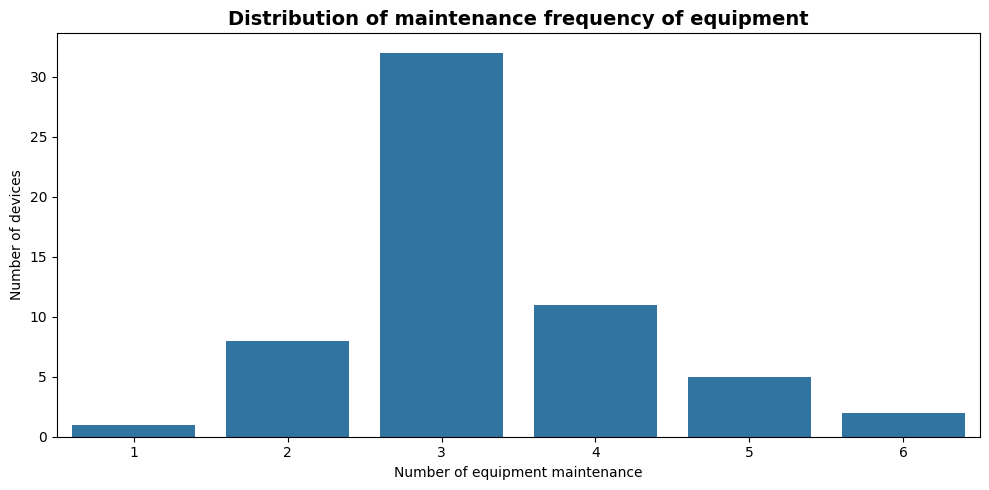

In [24]:

plt.figure(figsize=(10,5))
sns.barplot(
    x=freq_distribution.index,
    y=freq_distribution.values,
)

plt.title("Distribution of maintenance frequency of equipment", fontsize=14, fontweight='bold')
plt.xlabel("Number of equipment maintenance")
plt.ylabel("Number of devices")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

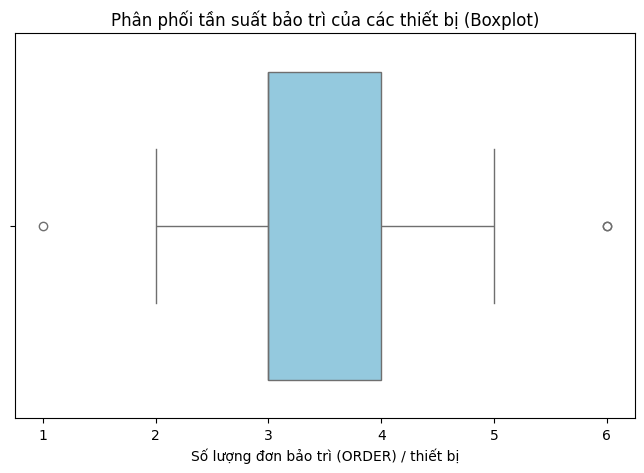

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=orders_per_equipment, color='skyblue')

plt.title("Phân phối tần suất bảo trì của các thiết bị (Boxplot)")
plt.xlabel("Số lượng đơn bảo trì (ORDER) / thiết bị")
plt.show()

In [26]:
# Đếm số ORDER duy nhất cho mỗi thiết bị
orders_per_equipment = df.groupby('EQUIPMENT_ID')['ORDER'].nunique()

# Lọc các thiết bị có đúng 1 lần bảo trì
equip_1_order = orders_per_equipment[orders_per_equipment == 1]

print("🔹 Các thiết bị có đúng 1 lần bảo trì:")
print(equip_1_order)

# Đếm số ORDER duy nhất cho mỗi EQUIPMENT_ID
orders_per_equipment = df.groupby('EQUIPMENT_ID')['ORDER'].nunique()

# Lọc ra các thiết bị có đúng 6 lần bảo trì
equip_6_orders = orders_per_equipment[orders_per_equipment == 6]

print("🔹 Các thiết bị có đúng 6 lần bảo trì:")
print(equip_6_orders)

🔹 Các thiết bị có đúng 1 lần bảo trì:
EQUIPMENT_ID
10027911    1
Name: ORDER, dtype: int64
🔹 Các thiết bị có đúng 6 lần bảo trì:
EQUIPMENT_ID
10027384    6
10027680    6
Name: ORDER, dtype: int64



🔹 Cột: ORDER
- Số ngoại lai: 0 (0.00% dữ liệu)
- Khoảng IQR: [10194346.00, 10366072.00]
- Giá trị nhỏ nhất: 10242274.00, lớn nhất: 10326839.00


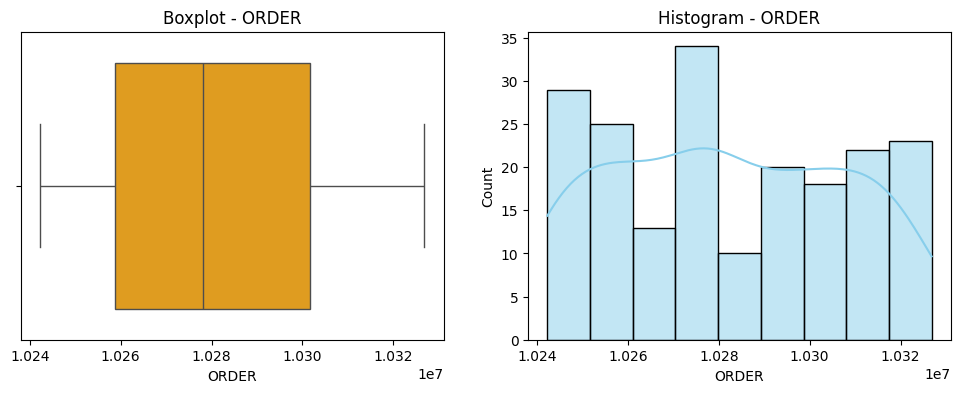


🔹 Cột: EQUIPMENT_ID
- Số ngoại lai: 0 (0.00% dữ liệu)
- Khoảng IQR: [9967507.50, 10063271.50]
- Giá trị nhỏ nhất: 10003386.00, lớn nhất: 10028003.00


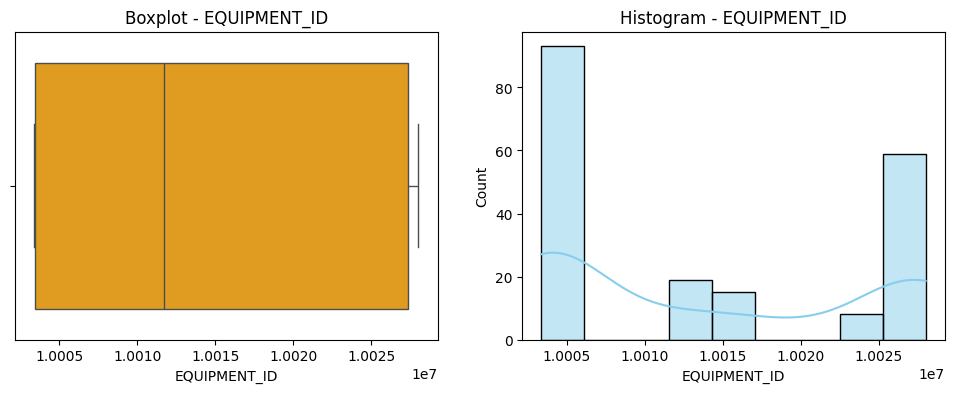

In [27]:
# Vòng lặp qua từng cột số
for col in num_cols:
    print(f"\n🔹 Cột: {col}")
    
    # Tính các giá trị thống kê
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Tìm giá trị ngoại lai
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"- Số ngoại lai: {outliers.shape[0]} ({outliers.shape[0] / len(df)*100:.2f}% dữ liệu)")
    print(f"- Khoảng IQR: [{lower:.2f}, {upper:.2f}]")
    print(f"- Giá trị nhỏ nhất: {df[col].min():.2f}, lớn nhất: {df[col].max():.2f}")

    # Vẽ boxplot + histogram
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.boxplot(x=df[col], ax=axes[0], color="orange")
    sns.histplot(df[col], kde=True, ax=axes[1], color="skyblue")
    axes[0].set_title(f"Boxplot - {col}")
    axes[1].set_title(f"Histogram - {col}")
    plt.show()


In [28]:
# Lấy danh sách các cột dạng phân loại (object, category)
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Các cột phân loại (categorical):")
for col in cat_cols:
    print(f"- {col}")

Các cột phân loại (categorical):
- BASIC_START_DATE
- ORDER_TYPE
- DESCRIPTION


In [29]:
# Đảm bảo định dạng ngày tháng đúng
df['BASIC_START_DATE'] = pd.to_datetime(df['BASIC_START_DATE'], errors='coerce')

# Đếm số lần xuất hiện (số đơn bảo trì) mỗi ngày
date_counts = df['BASIC_START_DATE'].value_counts().sort_values(ascending=False)

print("🔹 Tần suất bảo trì theo ngày (BASIC_START_DATE):")
print(date_counts) 


🔹 Tần suất bảo trì theo ngày (BASIC_START_DATE):
BASIC_START_DATE
2025-06-03    5
2025-07-29    5
2025-04-25    3
2025-08-15    3
2025-02-19    3
             ..
2025-03-18    1
2025-04-08    1
2025-03-12    1
2025-03-19    1
2025-03-10    1
Name: count, Length: 156, dtype: int64


C:\Users\Phuc An Nguyen\AppData\Local\Temp\ipykernel_12508\3539677085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BASIC_START_DATE'] = pd.to_datetime(df['BASIC_START_DATE'], errors='coerce')


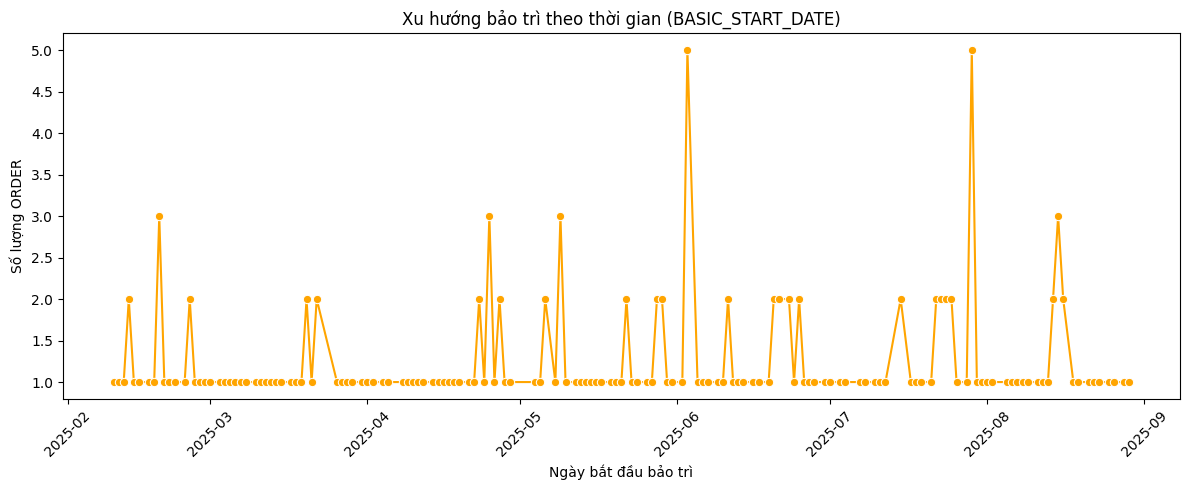

In [30]:
plt.figure(figsize=(12,5))
sns.lineplot(x=date_counts.index, y=date_counts.values, marker='o', color='orange')
plt.title("Xu hướng bảo trì theo thời gian (BASIC_START_DATE)")
plt.xlabel("Ngày bắt đầu bảo trì")
plt.ylabel("Số lượng ORDER")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Phuc An Nguyen\AppData\Local\Temp\ipykernel_12508\2076734401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BASIC_START_DATE'] = pd.to_datetime(df['BASIC_START_DATE'], errors='coerce')


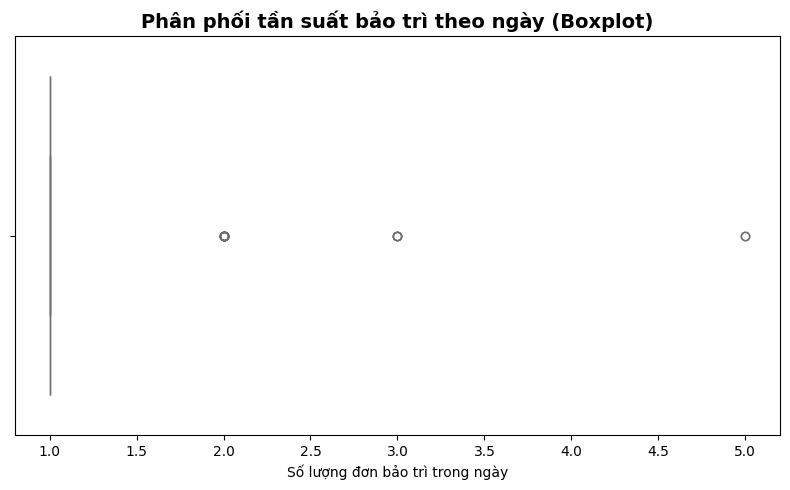

In [31]:
# Đảm bảo cột BASIC_START_DATE là datetime
df['BASIC_START_DATE'] = pd.to_datetime(df['BASIC_START_DATE'], errors='coerce')

# Đếm số đơn bảo trì mỗi ngày
date_counts = df['BASIC_START_DATE'].value_counts().sort_index()

# Chuyển thành DataFrame để dễ vẽ
date_counts_df = pd.DataFrame({
    'BASIC_START_DATE': date_counts.index,
    'ORDER_COUNT': date_counts.values
})

plt.figure(figsize=(8,5))
sns.boxplot(x=date_counts_df['ORDER_COUNT'], color='skyblue')

plt.title("Phân phối tần suất bảo trì theo ngày (Boxplot)", fontsize=14, fontweight='bold')
plt.xlabel("Số lượng đơn bảo trì trong ngày")
plt.tight_layout()
plt.show()

In [32]:
# Tính Q1, Q3 và IQR
Q1 = date_counts_df['ORDER_COUNT'].quantile(0.25)
Q3 = date_counts_df['ORDER_COUNT'].quantile(0.75)
IQR = Q3 - Q1

# Xác định ngưỡng outlier (cao bất thường)
upper_limit = Q3 + 1.5 * IQR

# Lọc ra những ngày có số đơn bảo trì vượt ngưỡng
outliers_high = date_counts_df[date_counts_df['ORDER_COUNT'] > upper_limit]

print("⚠️ Các ngày có số lượng đơn bảo trì cao bất thường (Outliers):")
print(outliers_high.sort_values(by='ORDER_COUNT', ascending=False))

⚠️ Các ngày có số lượng đơn bảo trì cao bất thường (Outliers):
    BASIC_START_DATE  ORDER_COUNT
131       2025-07-29            5
90        2025-06-03            5
8         2025-02-19            3
60        2025-04-25            3
69        2025-05-09            3
145       2025-08-15            3
33        2025-03-20            2
35        2025-03-22            2
62        2025-04-27            2
13        2025-02-25            2
58        2025-04-23            2
3         2025-02-13            2
85        2025-05-28            2
80        2025-05-22            2
67        2025-05-06            2
86        2025-05-29            2
104       2025-06-21            2
105       2025-06-23            2
96        2025-06-11            2
103       2025-06-20            2
120       2025-07-15            2
107       2025-06-25            2
125       2025-07-22            2
126       2025-07-23            2
128       2025-07-25            2
127       2025-07-24            2
144       2025-08-1

In [34]:
outlier_count = outliers_high.shape[0]

print(f"⚠️ Tổng số ngày outlier (bảo trì nhiều bất thường): {outlier_count}")
print("\n🔹 Các ngày outlier:")
print(outliers_high.sort_values(by='ORDER_COUNT', ascending=False))

⚠️ Tổng số ngày outlier (bảo trì nhiều bất thường): 28

🔹 Các ngày outlier:
    BASIC_START_DATE  ORDER_COUNT
131       2025-07-29            5
90        2025-06-03            5
8         2025-02-19            3
60        2025-04-25            3
69        2025-05-09            3
145       2025-08-15            3
33        2025-03-20            2
35        2025-03-22            2
62        2025-04-27            2
13        2025-02-25            2
58        2025-04-23            2
3         2025-02-13            2
85        2025-05-28            2
80        2025-05-22            2
67        2025-05-06            2
86        2025-05-29            2
104       2025-06-21            2
105       2025-06-23            2
96        2025-06-11            2
103       2025-06-20            2
120       2025-07-15            2
107       2025-06-25            2
125       2025-07-22            2
126       2025-07-23            2
128       2025-07-25            2
127       2025-07-24            2
144   

In [35]:
# Đếm số lần xuất hiện của từng loại ORDER_TYPE
order_type_counts = df['ORDER_TYPE'].value_counts()

print("🔹 Tần suất xuất hiện của từng ORDER_TYPE:")
print(order_type_counts)

🔹 Tần suất xuất hiện của từng ORDER_TYPE:
ORDER_TYPE
PM10    185
ZPM3      8
PM02      1
Name: count, dtype: int64


In [36]:
print(df[df['ORDER_TYPE'] == 'ZPM3'])

        ORDER BASIC_START_DATE  EQUIPMENT_ID ORDER_TYPE           DESCRIPTION
298  10247807       2025-07-29      10012948       ZPM3  AM BRISTLE CUTTING 1
300  10247811       2025-07-29      10012949       ZPM3  AM BRISTLE CUTTING 2
302  10247815       2025-07-29      10012950       ZPM3  AM BRISTLE CUTTING 3
304  10247819       2025-07-29      10027354       ZPM3  AM BRISTLE CUTTING 4
310  10247806       2025-06-03      10012948       ZPM3  AM BRISTLE CUTTING 1
312  10247810       2025-06-03      10012949       ZPM3  AM BRISTLE CUTTING 2
314  10247814       2025-06-03      10012950       ZPM3  AM BRISTLE CUTTING 3
316  10247818       2025-06-03      10027354       ZPM3  AM BRISTLE CUTTING 4


In [37]:
print(df[df['ORDER_TYPE'] == 'PM02'])

        ORDER BASIC_START_DATE  EQUIPMENT_ID ORDER_TYPE  \
306  10261025       2025-06-17      10027911       PM02   

                          DESCRIPTION  
306  PM HE THONG HUT KHOI CHO MAY AFT  


In [38]:
# Đếm số lần xuất hiện của từng mô tả công việc bảo trì
description_counts = df['DESCRIPTION'].value_counts()
description_counts = df['DESCRIPTION'].value_counts().sort_values(ascending=False)

print("🔹 Tần suất xuất hiện của từng DESCRIPTION:")
print(description_counts)  

🔹 Tần suất xuất hiện của từng DESCRIPTION:
DESCRIPTION
RM TF1AFT04                         6
RM TF1AFT01                         6
RM TF1HPT04                         5
RM TF1HPT02                         5
RM TF1E0101                         5
RM TF1AFT03                         5
RM TF1AFT02                         5
RM TF1E1502/E1501                   4
RM TF1E0201                         4
RM TF1FLX02                         4
RM TF1E0701                         4
RM TF1HPT07                         4
RM TF1AFT05                         4
RM TF1FLX01                         4
RM TF1HPT03                         4
RM TF1HPT06                         4
RM TF1HPT05                         4
RM TF1HPT01                         4
RM TF1E1602/E1601                   3
RM TF1E0601                         3
RM TF1E0501                         3
RM TF1E1201                         3
RM TF1E1801/E1802                   3
RM TF1E1002                         3
RM TF1E1401/E1402                

In [39]:
df[df['DESCRIPTION'].isin(['RM TF1AFT04', 'RM TF1AFT01'])]

,ORDER,BASIC_START_DATE,EQUIPMENT_ID,ORDER_TYPE,DESCRIPTION
20,10263705,2025-03-26,10027680,PM10,RM TF1AFT04
48,10271936,2025-04-15,10027384,PM10,RM TF1AFT01
56,10308511,2025-07-17,10027680,PM10,RM TF1AFT04
70,10301670,2025-06-20,10027680,PM10,RM TF1AFT04
78,10301675,2025-06-25,10027384,PM10,RM TF1AFT01
114,10242289,2025-02-19,10027384,PM10,RM TF1AFT01
166,10283798,2025-05-22,10027384,PM10,RM TF1AFT01
218,10290652,2025-05-28,10027680,PM10,RM TF1AFT04
248,10313357,2025-07-23,10027384,PM10,RM TF1AFT01
264,10278025,2025-04-25,10027680,PM10,RM TF1AFT04


In [40]:
# Tính hệ số tương quan Pearson
corr_matrix = df[num_cols].corr(method='pearson')

# Xem trước 5 dòng đầu
corr_matrix.head()

,ORDER,EQUIPMENT_ID
ORDER,1.000000,0.066012
EQUIPMENT_ID,0.066012,1.000000


In [41]:
from scipy import stats
from scipy.stats import chi2_contingency
def correlation_ratio(categories, values):
    categories = pd.Categorical(categories)
    cat_num = len(categories.categories)
    y_avg = np.mean(values)
    numerator = sum([len(values[categories == cat]) * (np.mean(values[categories == cat]) - y_avg)**2 for cat in categories.categories])
    denominator = sum((values - y_avg)**2)
    return np.sqrt(numerator / denominator) if denominator != 0 else 0

In [42]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [43]:
cols = list(num_cols) + list(cat_cols)
corr_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), index=cols, columns=cols)

for i in cols:
    for j in cols:
        if i == j:
            corr_matrix.loc[i, j] = 1
        elif i in num_cols and j in num_cols:
            corr_matrix.loc[i, j] = df[[i, j]].corr().iloc[0, 1]
        elif i in cat_cols and j in cat_cols:
            corr_matrix.loc[i, j] = cramers_v(df[i], df[j])
        else:
            # numeric vs categorical
            num_var = i if i in num_cols else j
            cat_var = j if j in cat_cols else i
            corr_matrix.loc[i, j] = correlation_ratio(df[cat_var], df[num_var])

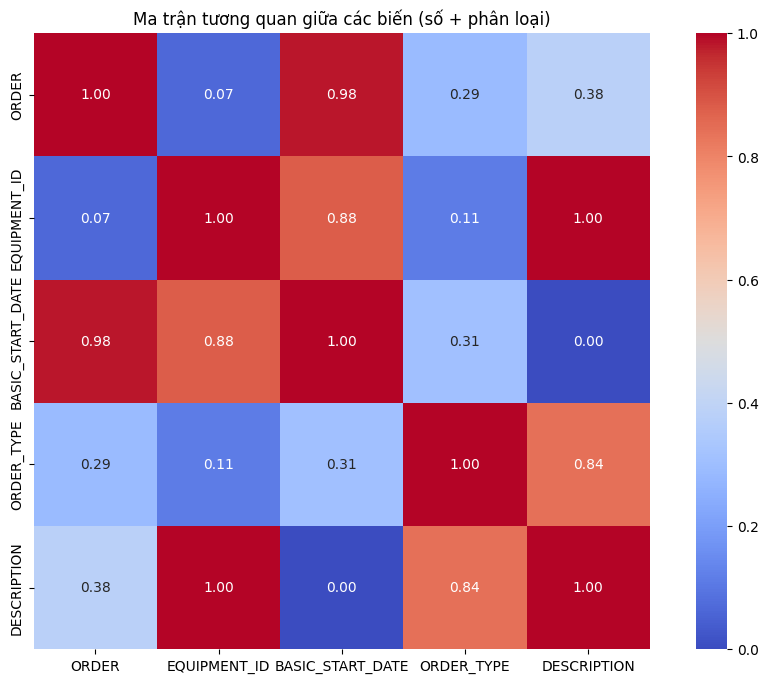

In [44]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Ma trận tương quan giữa các biến (số + phân loại)")
plt.show()